In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Height-Weight Data.csv')

In [4]:
df.head(1)

,Height,Weight
0,73.847017,241.893563


In [5]:
df.Height.head(1)
df['Height'].head(2)

0    73.847017
1    68.781904
Name: Height, dtype: float64

In [6]:
df[3:5]

,Height,Weight
3,71.730978,220.042470
4,69.881796,206.349801


In [7]:
df.mean()

Height     69.024411
Weight    186.891258
dtype: float64

In [8]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [9]:
df.shape

(3501, 2)

In [10]:
z,x=df.shape

In [11]:
z

3501

In [12]:
x

2

In [13]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

# Visualization

Text(0.5, 1.0, 'Height vs weight data plot')

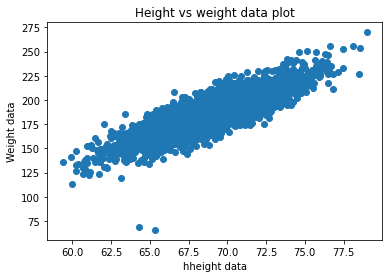

In [14]:
plt.scatter(df.Height,df.Weight)
plt.xlabel('hheight data')
plt.ylabel('Weight data')
plt.title('Height vs weight data plot')

In [15]:
x=df.Height
x=[df.Height]
x=df['Height']
x=df[['Height']]   #x is independent, independent is needed to be 2 D
y=df['Weight']     #y is dependent, dependent is 1D

In [16]:
x.head(1)
y.head(1)

0    241.893563
Name: Weight, dtype: float64

# Now Split the dataset into train and test

In [17]:
from sklearn.model_selection import train_test_split as tts
atrain,atest,btrain,btest=tts(x,y,test_size=0.3)  #atrain,atest=Independent part;;btrain,btest=Dependent part

In [18]:
atrain.shape

(2450, 1)

In [19]:
atest.shape

(1051, 1)

In [20]:
atrain.head(2)

,Height
2226,65.562804
3276,70.432048


In [21]:
btrain.head(2)

2226    162.521916
3276    193.237605
Name: Weight, dtype: float64

# Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(atrain,btrain)

LinearRegression()

In [23]:
m=reg.coef_
m

array([5.90907396])

In [24]:
c=reg.intercept_
c

-221.00405188735903

In [25]:
df.head(2)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473


In [26]:
#y=m*x+c
y2=(m*68.781904)+c
y2
y1=(m*73.84701)+c
y1
y2

array([185.43330571])

In [27]:
reg.predict([[68.781904]])

array([185.43330571])

In [28]:
p_test=reg.predict(atest)
p_test

array([148.82699236, 179.20127469, 161.23438958, ..., 190.81362545,
       179.52768898, 184.17500032])

In [29]:
p_train=reg.predict(atrain)
p_train

array([166.41140663, 195.18413042, 164.9380227 , ..., 176.57916951,
       177.14969337, 133.17786174])

# Accuracy Finding

In [30]:
from sklearn.metrics import r2_score

In [31]:
reg.score(atrain,btrain)

0.7211148425965903

In [32]:
r2_score(btrain,p_train)

0.7211148425965903

In [33]:
reg.score(atest,btest)

0.7563545724447812

In [34]:
r2_score(btest,p_test)

0.7563545724447812